In [65]:
#@title Download Dataset
%cd /content/
!git clone https://github.com/p-p-p-p/Spectral-Data-Analysis.git
!rm -rf /content/dataset

/content
fatal: destination path 'Spectral-Data-Analysis' already exists and is not an empty directory.


In [66]:
#@title Clean Dataset
import pandas as pd
import os

# Source and destination folders
source_folder = "/content/Spectral-Data-Analysis/dataset"
clean_folder = "/content/Dataset"

# Create destination folder if not exists
os.makedirs(clean_folder, exist_ok=True)

# Smoothing window size
window_size = 5
csv_list=[]
# Copy, rename, clean, and save
for file_name in os.listdir(source_folder):
    if file_name.endswith(".csv"):
        new_name = file_name.replace("spectral_signature_", "")
        src_path = os.path.join(source_folder, file_name)
        dst_path = os.path.join(clean_folder, new_name)

        # Read and clean the data
        df = pd.read_csv(src_path)
        df.rename(columns={'reflectance': 'raw_reflectance'}, inplace=True)
        df['reflectance'] = df['raw_reflectance'].rolling(window=window_size, center=True).mean()
        df.dropna(inplace=True)

        # Save the cleaned data
        df.to_csv(dst_path, index=False)
        csv_list.append(dst_path)
csv_list

['/content/Dataset/sugarcane_jhagdia.csv',
 '/content/Dataset/legumes_anand.csv',
 '/content/Dataset/cucumber_kota.csv',
 '/content/Dataset/mango_talala.csv',
 '/content/Dataset/wheat_jhagdia.csv',
 '/content/Dataset/wheat_kota.csv',
 '/content/Dataset/banana_anand.csv',
 '/content/Dataset/mustard_kota.csv',
 '/content/Dataset/sapota_talala.csv',
 '/content/Dataset/onion_jhagdia.csv',
 '/content/Dataset/banana_jhagdia.csv',
 '/content/Dataset/tomato_maddur.csv',
 '/content/Dataset/eggplant_anand.csv',
 '/content/Dataset/cotton_maddur.csv',
 '/content/Dataset/mango_anand.csv']

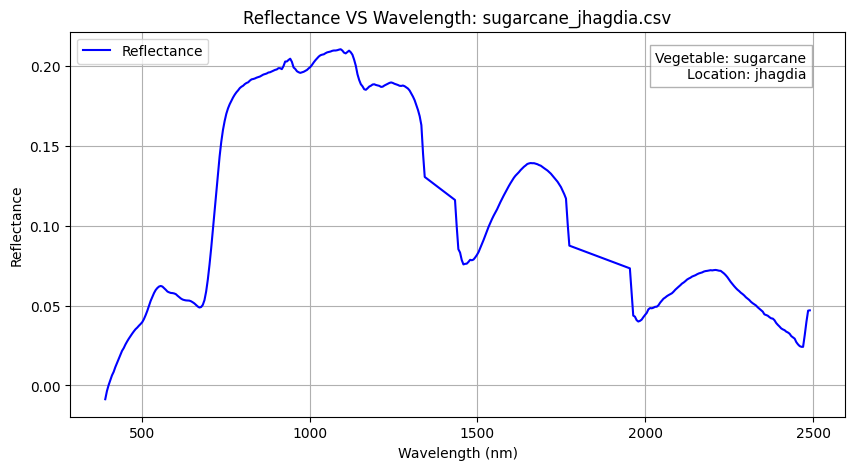

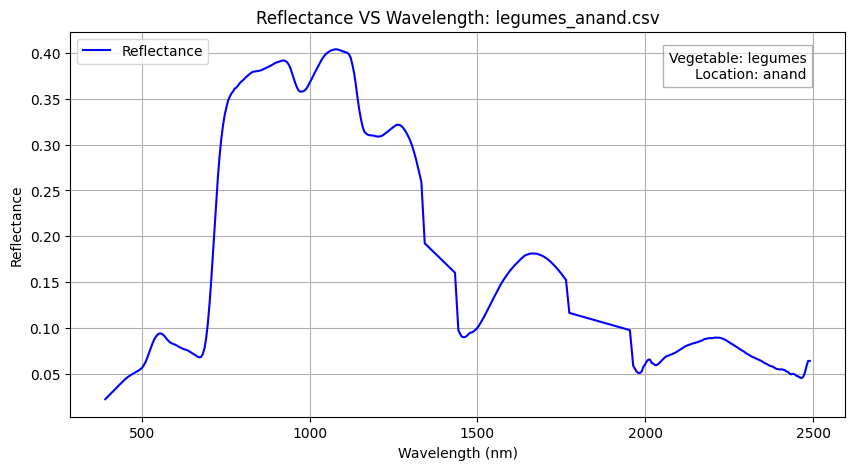

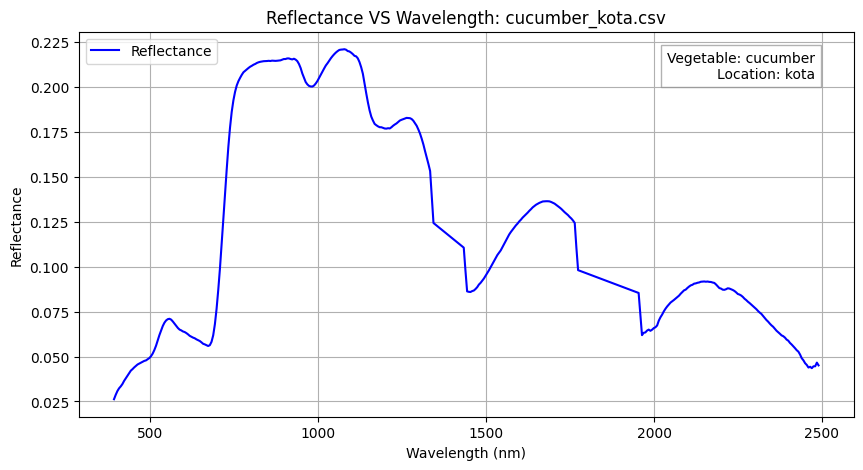

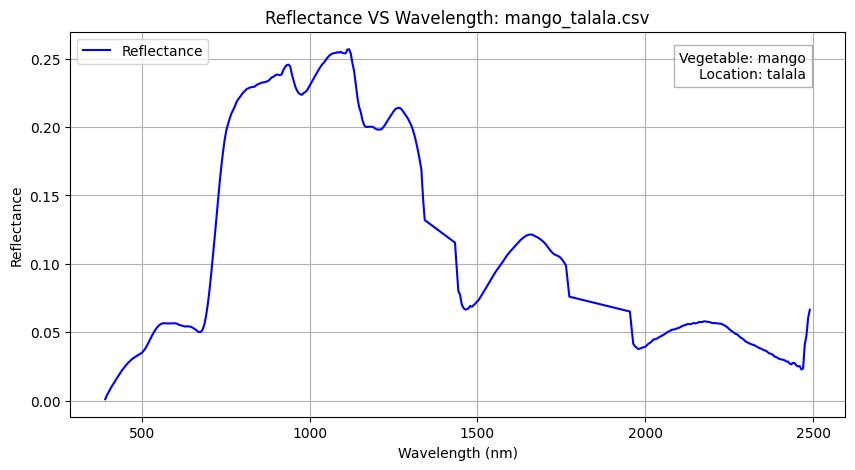

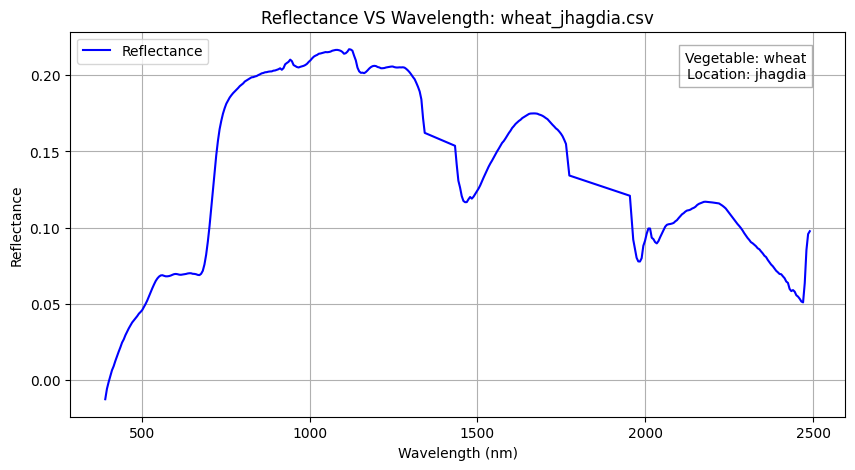

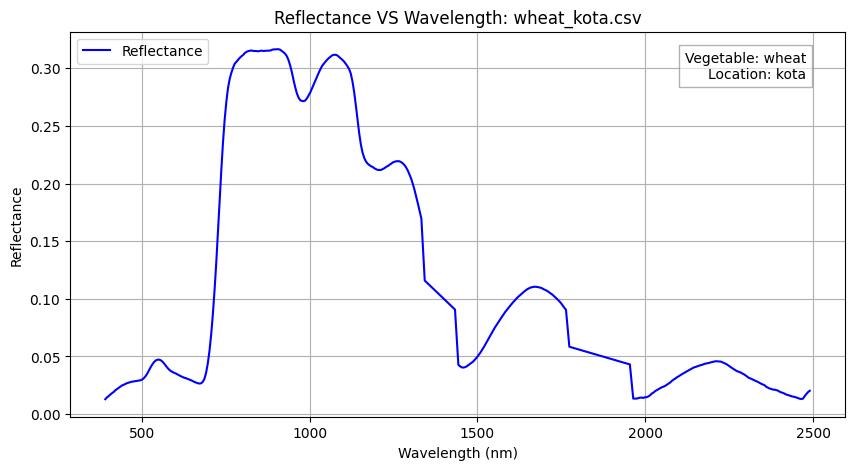

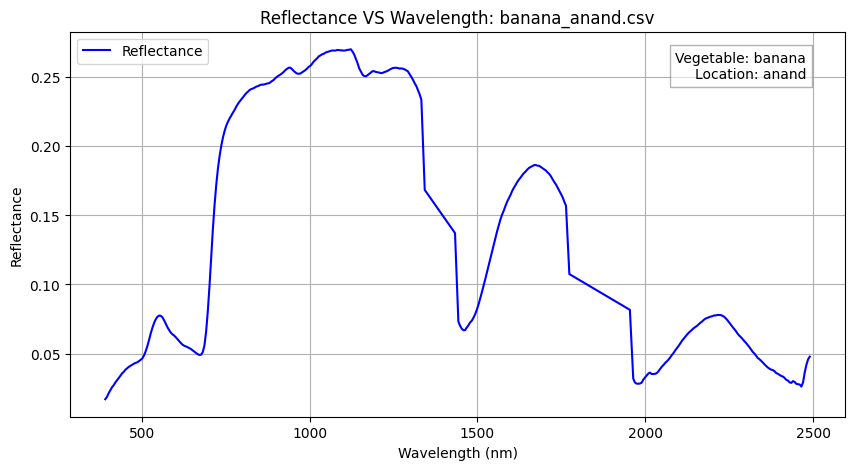

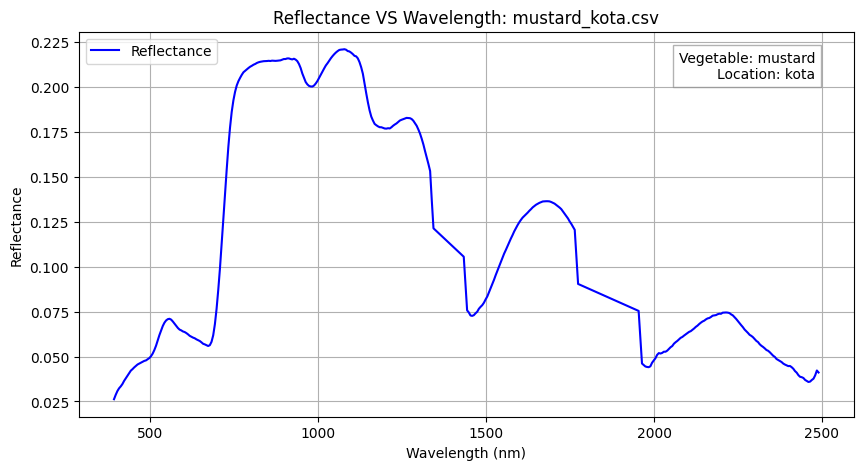

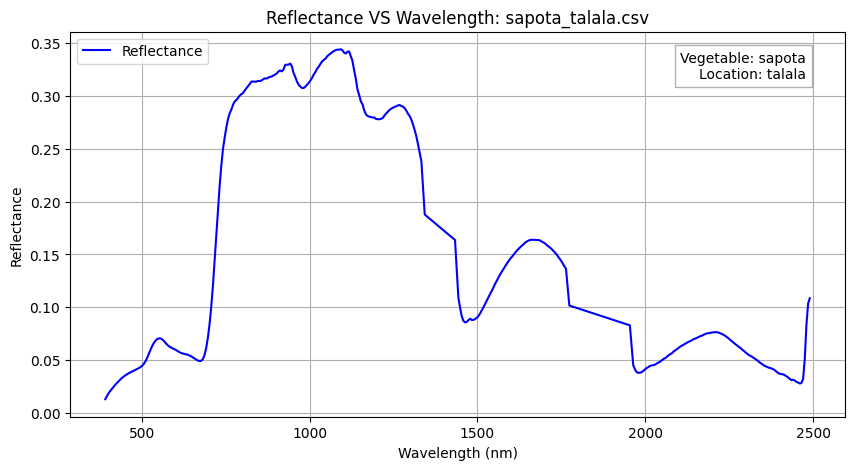

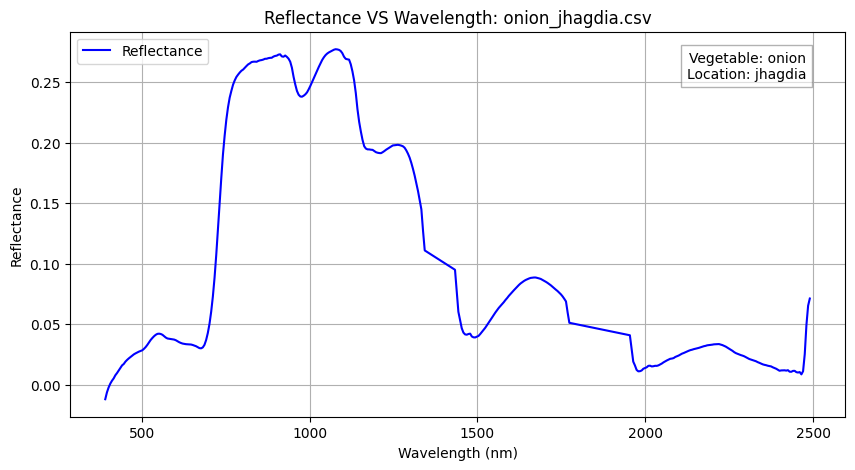

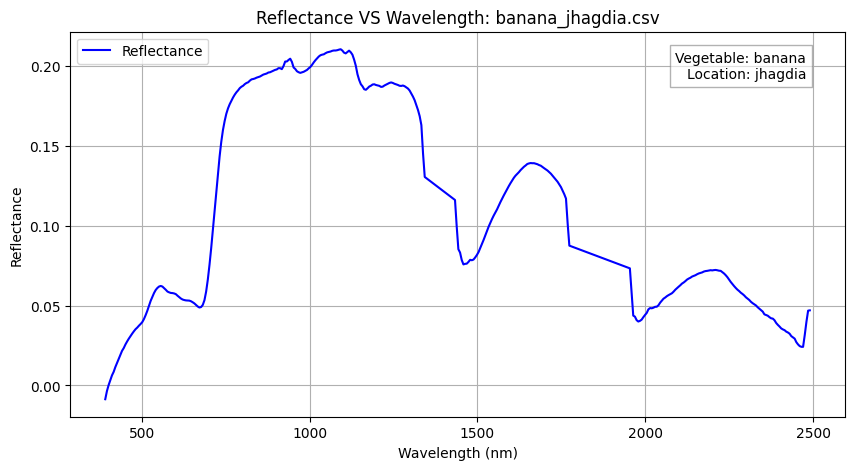

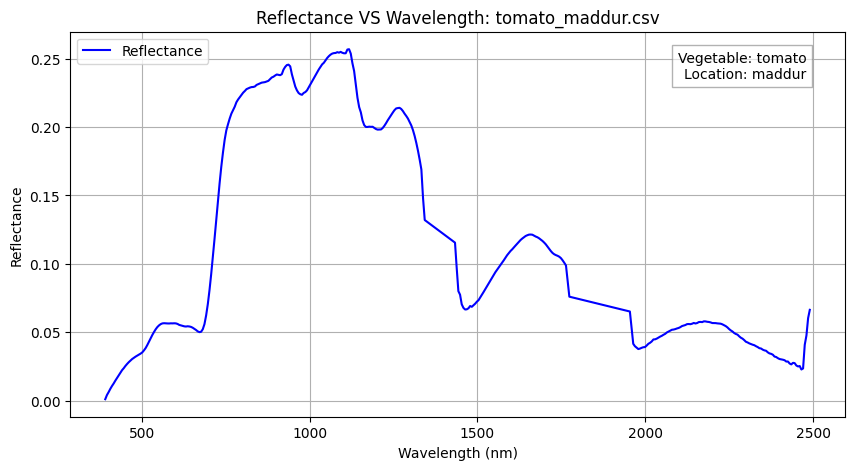

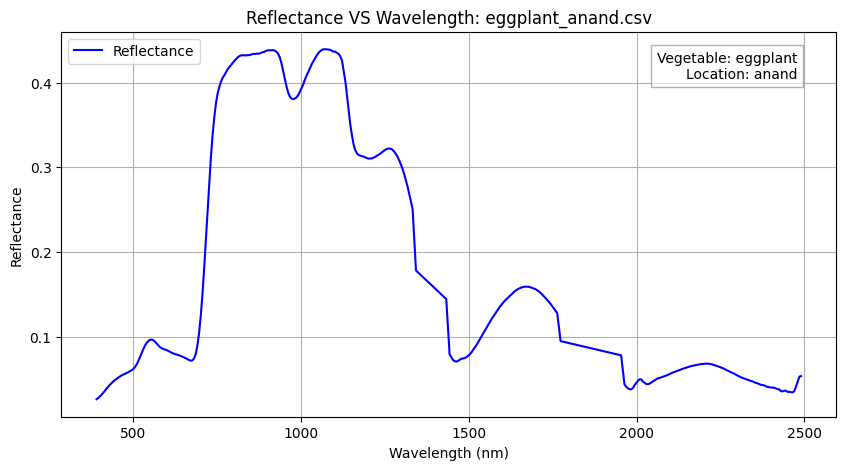

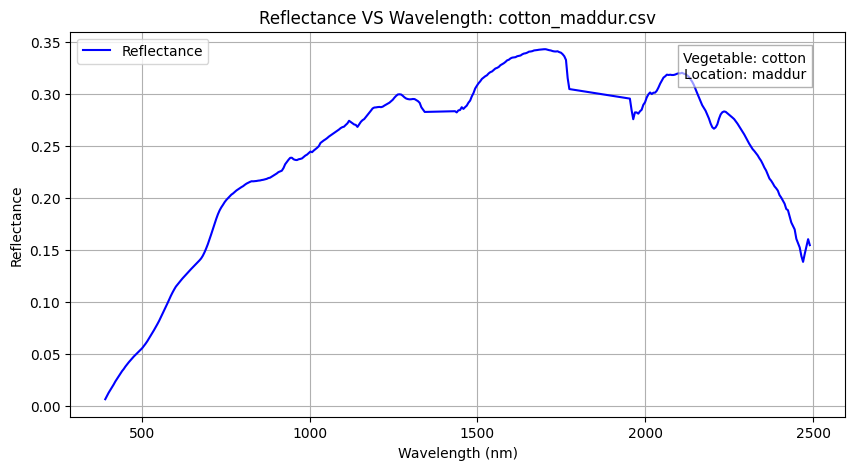

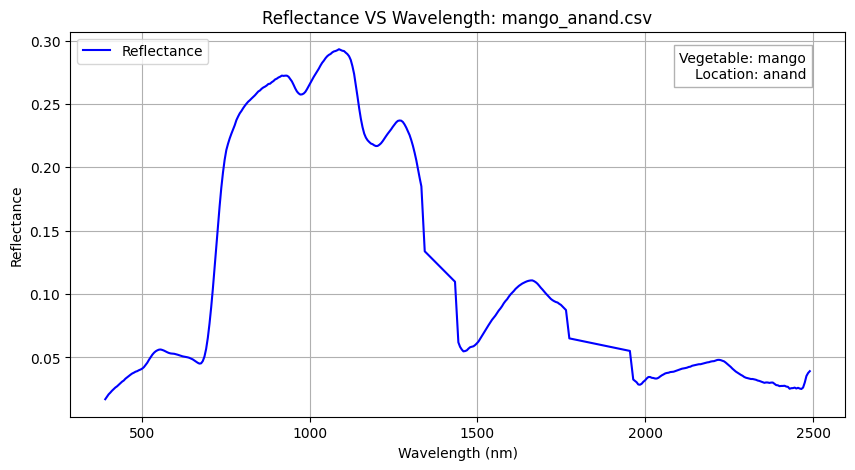

In [67]:
#@title Plot all csv File
import matplotlib.pyplot as plt
import pandas as pd
import os

def plot_smoothed_reflectance(csv_file):
    # Load the CSV file
    df = pd.read_csv(csv_file)

    # Get the base filename
    base_name = os.path.basename(csv_file)

    # Extract vegetable and location info
    vegetable_name = location = "Unknown"
    if "_" in base_name:
        try:
            vegetable_name, location = base_name.split("_")
            location = location.replace(".csv", "")
        except ValueError:
            pass

    # Plot using smoothed reflectance
    plt.figure(figsize=(10, 5))
    plt.plot(df['wavelength'], df['reflectance'], linestyle='-', color='blue', label='Reflectance')

    # Add annotation (top-right corner)
    plt.text(
        0.95, 0.95,
        f"Vegetable: {vegetable_name}\nLocation: {location}",
        transform=plt.gca().transAxes,
        fontsize=10,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray')
    )

    # Labels and title
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Reflectance')
    plt.title(f'Reflectance VS Wavelength: {base_name}')
    plt.legend()
    plt.grid()
    plt.show()

# Loop over all files and plot
for file in csv_list:
    plot_smoothed_reflectance(file)


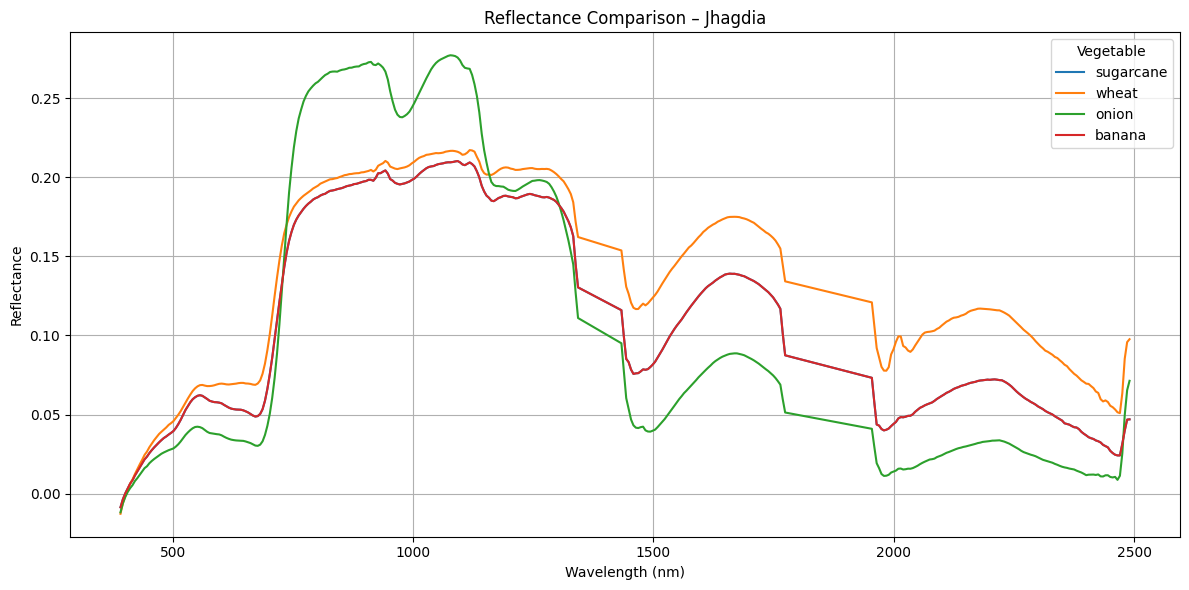

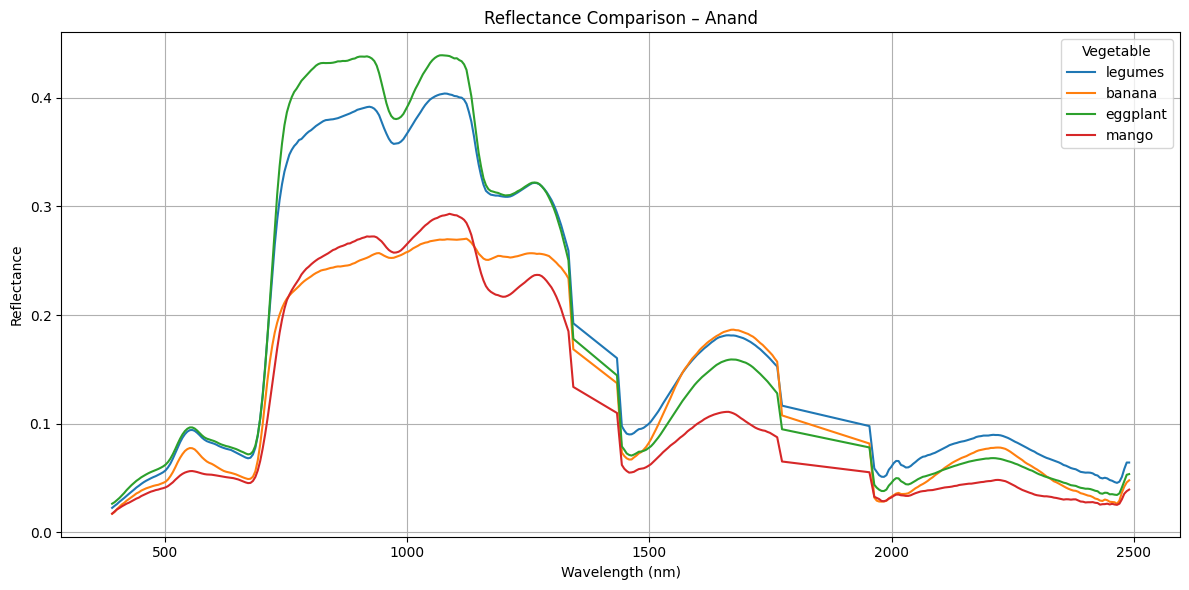

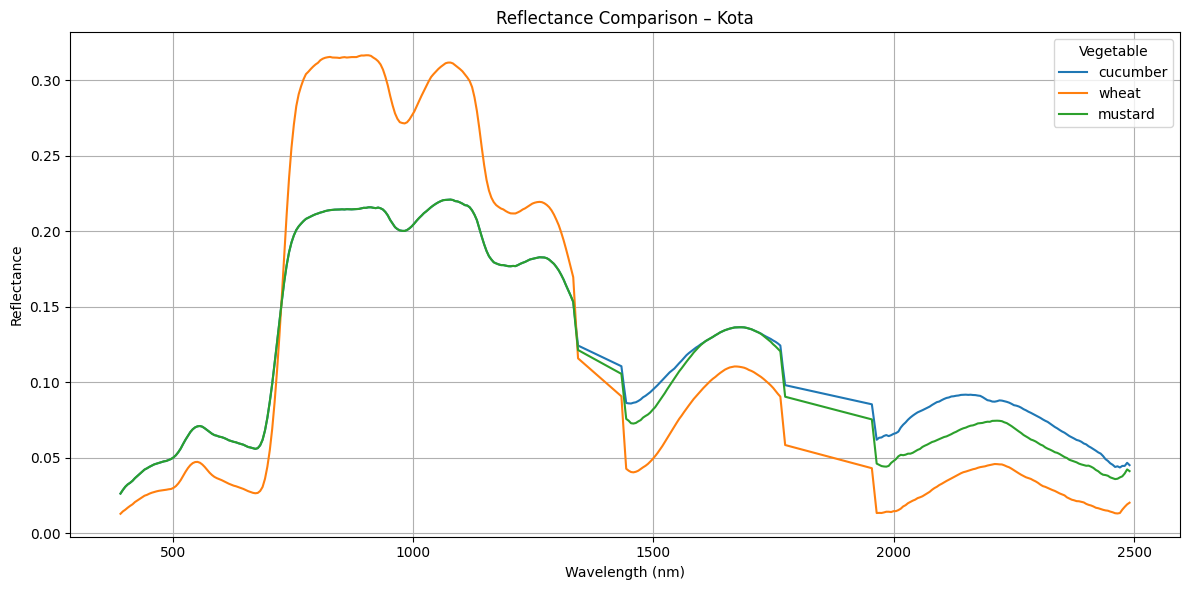

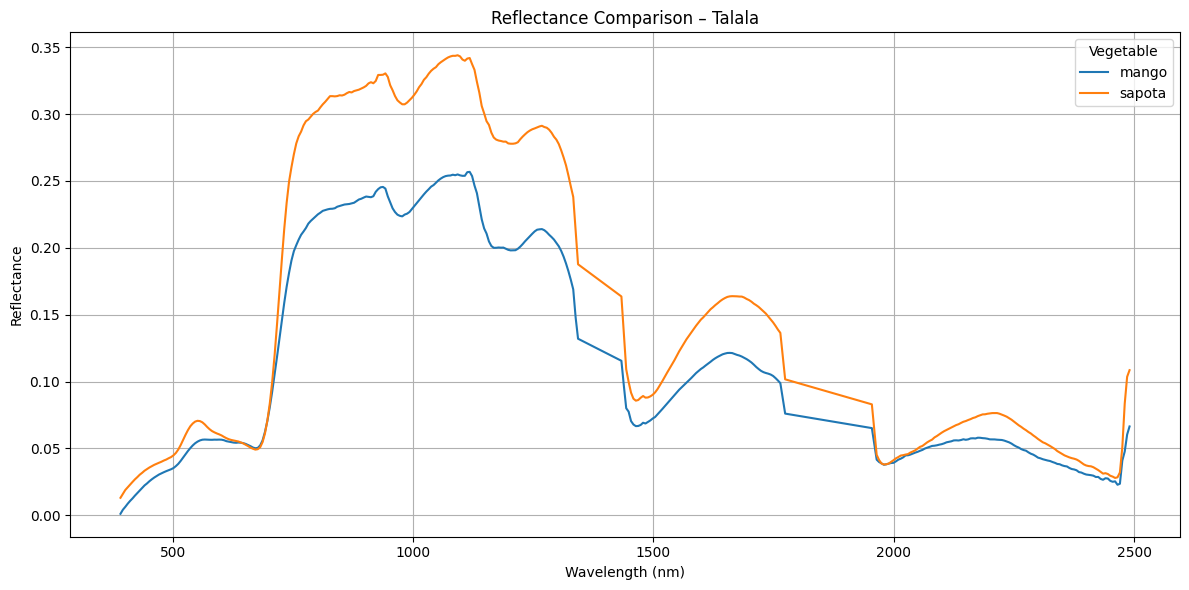

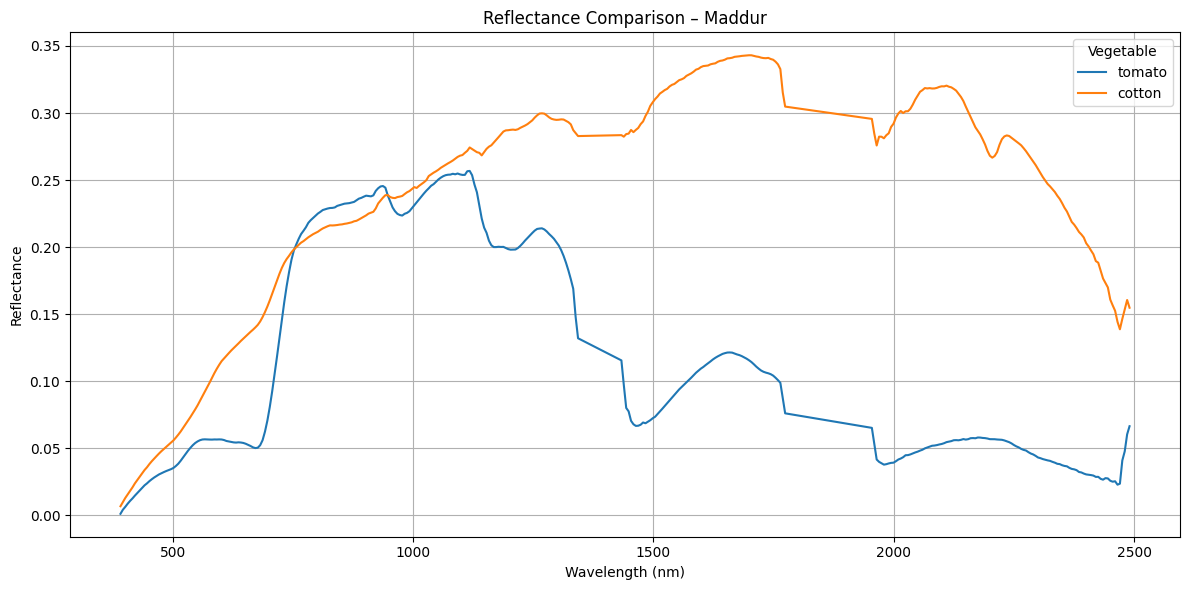

In [68]:
#@title Compare Reflectance for a specific location
df_dict = {}

for i in csv_list:
    base_name = os.path.basename(i)

    if "_" in base_name:
        try:
            vegetable_name, location = base_name.split("_")
            location = location.replace(".csv", "")

            if location not in df_dict:
                df_dict[location] = {}

            df_dict[location][vegetable_name] = i
        except ValueError:
            print(f"Skipping: {base_name} — doesn't match expected format.")


import matplotlib.pyplot as plt
import pandas as pd
import os

# Plot for each location
for location, veg_dict in df_dict.items():
    plt.figure(figsize=(12, 6))

    for idx, (vegetable, path) in enumerate(veg_dict.items()):
        df = pd.read_csv(path)
        plt.plot(df['wavelength'], df['reflectance'], label=vegetable)

    plt.title(f"Reflectance Comparison – {location.capitalize()}")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Reflectance")
    plt.legend(title="Vegetable")
    plt.grid()
    plt.tight_layout()
    plt.show()


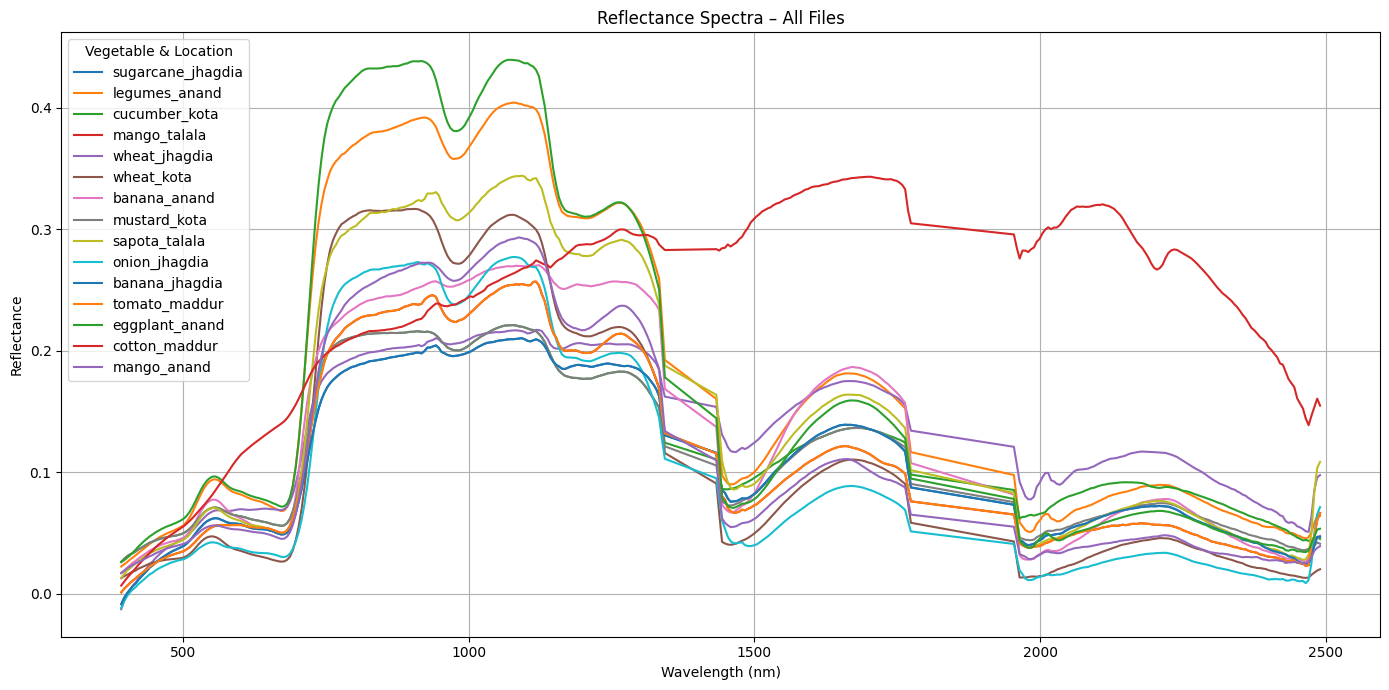

In [69]:
#@title Compare all Reflectance at the same time

import matplotlib.pyplot as plt
import pandas as pd
import os

plt.figure(figsize=(14, 7))

# Loop through all CSV files
for file in csv_list:
    df = pd.read_csv(file)
    base_name = os.path.basename(file).replace(".csv", "")

    # Plot the reflectance
    plt.plot(df['wavelength'], df['reflectance'], label=base_name)

# Add labels and title
plt.title("Reflectance Spectra – All Files")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.legend(title="Vegetable & Location")
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


<ipython-input-80-fca7cce70f36>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', num_files)  # 'tab20' supports up to 20 unique colors


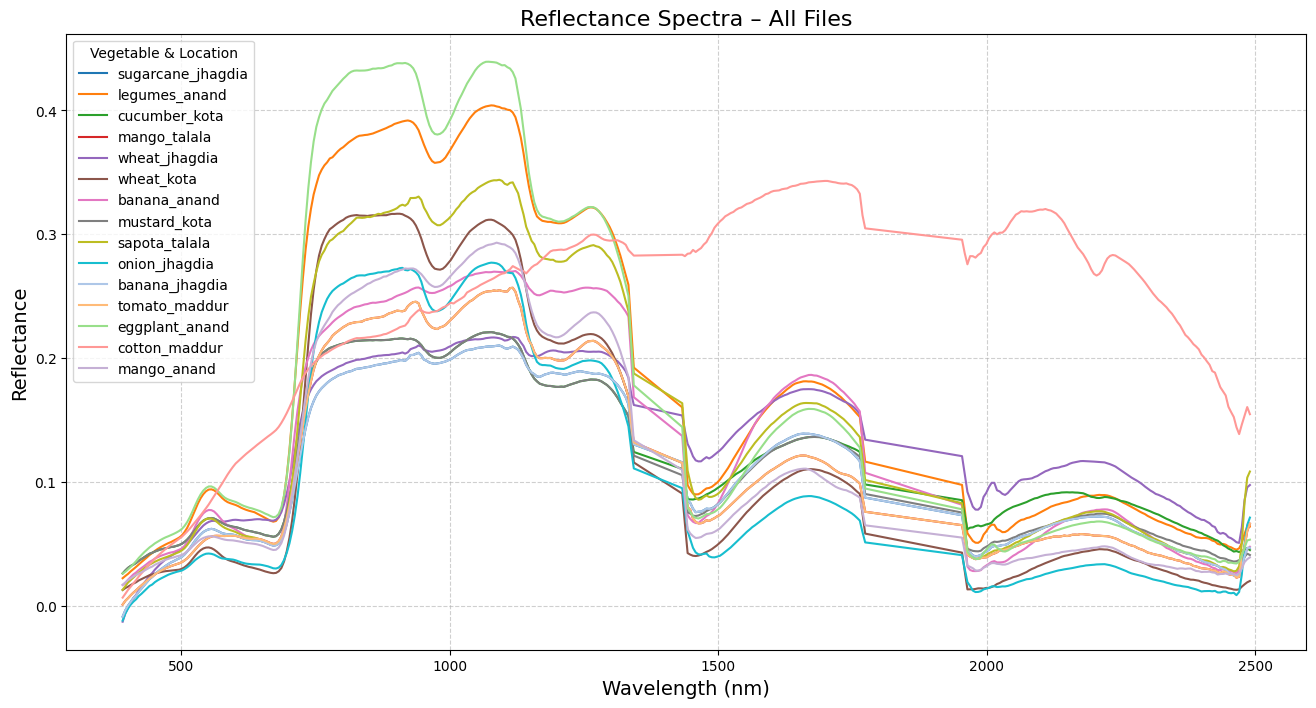

In [80]:
#@title Compare all Reflectance at the same time
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import os

# Create the figure
plt.figure(figsize=(16, 8))

# Ensure the number of colors equals or exceeds the number of files
num_files = len(csv_list)

# Use a high-quality colormap for categorical data
cmap = cm.get_cmap('tab20', num_files)  # 'tab20' supports up to 20 unique colors

# Alternatively, define a custom list of colors for better control
custom_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
    "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5"
]

# If there are more files than colors in the custom list, fall back to the colormap
colors = custom_colors if num_files <= len(custom_colors) else [cmap(i % cmap.N) for i in range(num_files)]

for idx, file in enumerate(csv_list):
    df = pd.read_csv(file)
    base_name = os.path.basename(file).replace(".csv", "")
    color = colors[idx]  # Use the custom color or colormap color

    plt.plot(df['wavelength'], df['reflectance'], label=base_name, color=color,)# linewidth=2)




# Labels and Title
plt.title("Reflectance Spectra – All Files", fontsize=16)
plt.xlabel("Wavelength (nm)", fontsize=14)
plt.ylabel("Reflectance", fontsize=14)
plt.legend(title="Vegetable & Location", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Vegetable & Location")
plt.show()